# Csound Tutorial with IPython Proof of Concept

By Jacob Joaquin<br />
May 2013<br />
Revised May 7th, 2013

## Introduction

Welcome to this the "Csound Tutorial with IPython Proof of Concept". This isn't meant to be a full tutorial, though it certainly does showcase some of the basic requirements of using the Csound6 API.

Before we get started, I want to thank the devs for all their insight on the Csound Mailing List. I would have not been able to get the Csound6 API up and running without their help.

I would also like to thank François Pinot for his Csound Journal article <a href="http://www.csounds.com/journal/issue14/realtimeCsoundPython.html">Real-time Coding Using the Python API: Score Events</a>. If you ever want to use IPython with Csound, I highly recommend you start with this.

## Setting Up IPython Notebook

To get things going, we need to be able to import the Python Csound6 library. Since Csound6 is still isn't released and you're most likely running your own build, there is some additional setup required. This may vary from system to system, but here are somethings to try in OS X and possibly other Unix based environments.

The first thing is to make sure you have your paths set correctly. Before launching IPython Notebook, I set the OPCODE6DIR64 environmental variable to the correct opcode directory.

When I launch IPython notebook, I also make sure to include additional arguments to ensure that graphs are created and embedded inline with the followind command-line action.

Now we can get things going.

## Using Csound6 API

One more path needs to be set for this to work, and that's the path of the Csound6 build. You'll you need to change out the path in the following cell to point to the build location of Csound6 on your machine.

In [2]:
import sys
import csnd

ImportError: No module named 'csnd'

Next, we create a csnd6 object as well as a csnd6 performance thread. Other things such as sending audio to the DAC, setting the rates, the channels, and 0dbfs.

In [2]:
cs = csnd6.Csound()
csPerf = csnd6.CsoundPerformanceThread(cs)
cs.SetOption('-odac')
cs.CompileOrc('''
sr = 44100
kr = 4410
ksmps = 10
nchnls = 1
0dbfs = 1.0
''')

0

Finally, we press the play button, which involves calling the csnd6 Start() method and the performance thread Play() method. (if there's a better way, let me know)

In [3]:
cs.Start()
csPerf.Play()

Csound is now running. At this point, there are no instruments loaded. Using the CompileOrc() method, we can load instruments dynamically into a runnind Csound process.

In [4]:
cs.CompileOrc('''
instr 1
    idur = p3
    iamp = p4
    ifreq = p5

    k1 line 1, idur, 0
    a1 oscils iamp, ifreq, 1
    out a1 * k1
endin
''')

0

Score events can be via the ReadScore() mehtod.

In [5]:
cs.ReadScore('i 1 0 1 0.5 440')

0

Or events can be created in the orchestra like this:

In [6]:
cs.CompileOrc('''event_i "i", 1, 0, 1, 0.5, 262''')

0

## Playing with Python

This is just a small example of using the Python language to generate score events. First, I'm going to define a custom function that will make generating events a little more pythonic.

In [7]:
def event(*args):
    e = ' '.join(map(str, args))
    cs.ReadScore(e)
    print e

This definition allows us to create parameterized events rather than having to concatenate strings. Additionally, this prints the actual score event string being generated.

In [8]:
event('i', 1, 0, 0.25, 0.707, 262)

i 1 0 0.25 0.707 262


Let's generate some random frequencies. First, we import the Python random() function.

In [9]:
from random import random

Then we create a loop that generates 8 notes with a random frequeny between 440Hz and 880Hz.

In [10]:
for t in xrange(8):
    event('i', 1, t, 1, 0.707, 440 + 440 * random())

i 1 0 1 0.707 595.345239993
i 1 1 1 0.707 584.875655908
i 1 2 1 0.707 664.103711761
i 1 3 1 0.707 643.93130537
i 1 4 1 0.707 852.790209143
i 1 5 1 0.707 720.383147878
i 1 6 1 0.707 598.042138928
i 1 7 1 0.707 524.759562968


## Plotting Tables

One of the beautiful aspects of IPython Notebook is the ability to easily create and display graphs. This can be applied to Csound f-tables. Below are two functions. The first, make_table(), creates a Csound f-table. The second, get_table_data(), returns a list of values contained in an f-table.

In [11]:
def make_table(*args):
    data = ', '.join(map(str, list(args)))
    data = 'gitemp ftgen ' + data
    print data
    cs.CompileOrc(data)

def get_table_data(t):
    length = cs.TableLength(t)
    array = csnd6.doubleArray(length)
    cs.TableCopyOut(t, array)
    table = []
    
    for i in xrange(length):
        table.append(array[i])

    return table

Let's go ahead and generate a sine wave table with 256 points of data.

In [12]:
make_table(1, 0, 256, 10, 1)

gitemp ftgen 1, 0, 256, 10, 1


Now, let's retrieve the data from Csound.

In [13]:
sine_table = get_table_data(1)

Finally, let's plot it with the plot() function.

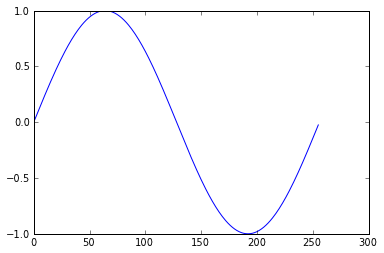

In [14]:
plot(sine_table)

That was fairly easily. Let's do it one more time, but let's generate an envelope shape with GEN07.

gitemp ftgen 2, 0, 16, 7, 0, 4, 1, 2, 0.5, 7, 0.5, 2, 0


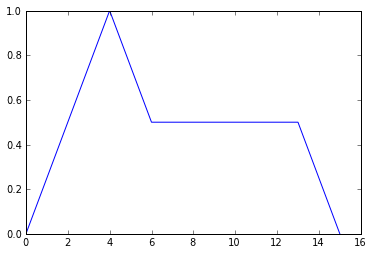

In [15]:
make_table(2, 0, 16, 7, 0, 4, 1, 2, 0.5, 7, 0.5, 2, 0)
t2 = get_table_data(2)
plot(t2)

## Stopping Csound

We can stop the Csound performance thread with the following action.

In [16]:
csPerf.Stop()

## Conclusion

And that's it for now.